<a href="https://colab.research.google.com/github/benasphy/GMM/blob/main/GMM_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

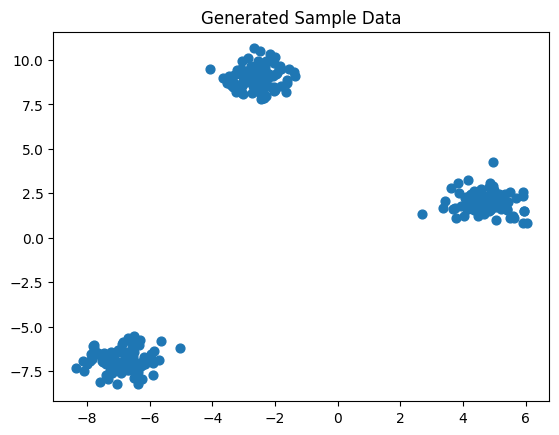

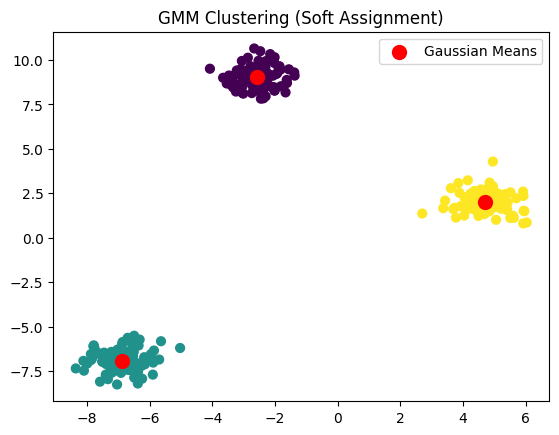

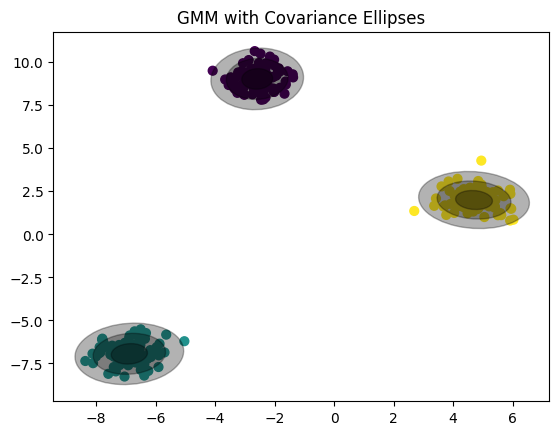

📌 GMM Parameters
- Means (μ):
 [[-2.58361866  9.03185632]
 [-6.88217395 -6.94243433]
 [ 4.70421356  1.99562444]]
- Covariances (Σ):
 [[[ 0.26952915  0.01572624]
  [ 0.01572624  0.35537521]]

 [[ 0.3706632   0.03446655]
  [ 0.03446655  0.35379858]]

 [[ 0.38532143 -0.03543947]
  [-0.03543947  0.30601282]]]
- Weights (π):
 [0.33333333 0.33333333 0.33333333]


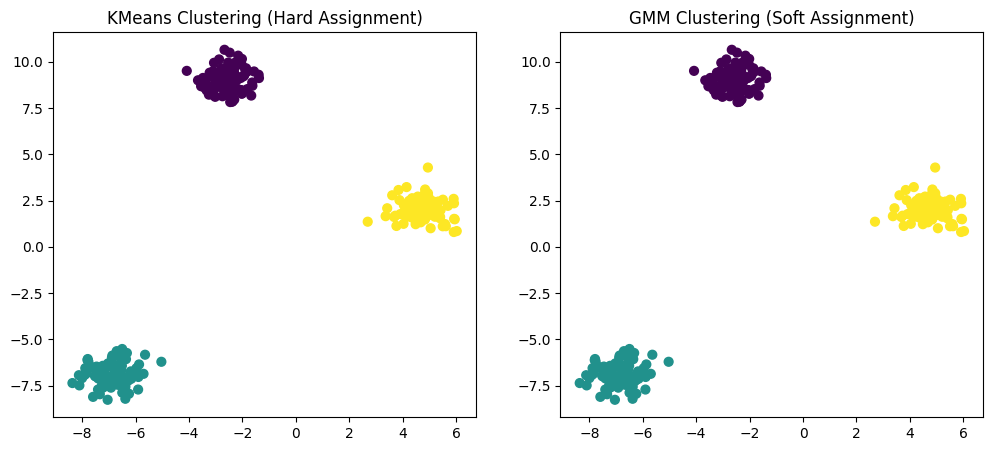

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse


# Step 1: Generate Custom Dataset

X, y_true = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=0.60,
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], s=40)
plt.title("Generated Sample Data")
plt.show()


# Step 2: Fit Gaussian Mixture Model

gmm = GaussianMixture(
    n_components=3,         # Number of Gaussian components
    covariance_type='full', # Type of covariance ('full', 'tied', 'diag', 'spherical')
    random_state=42
)
gmm.fit(X)

labels = gmm.predict(X)       # Cluster labels (soft assignment)
probs = gmm.predict_proba(X)  # Probabilities of each point in each Gaussian


# Step 3: Visualize GMM Clustering

plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=100, label='Gaussian Means')
plt.title("GMM Clustering (Soft Assignment)")
plt.legend()
plt.show()


# Step 4: Visualize Gaussian Ellipses (Covariances)

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):  # Full covariance matrix
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:  # Diagonal covariance
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    for nsig in range(1, 4):  # 1 to 3 standard deviations
        # Pass angle as a keyword argument
        ax.add_patch(Ellipse(position, nsig*width, nsig*height, angle=angle, **kwargs))

plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
ax = plt.gca()
for pos, covar in zip(gmm.means_, gmm.covariances_):
    draw_ellipse(pos, covar, ax=ax, alpha=0.3, color='black')
plt.title("GMM with Covariance Ellipses")
plt.show()


# Step 5: Print GMM Parameters

print("📌 GMM Parameters")
print("- Means (μ):\n", gmm.means_)
print("- Covariances (Σ):\n", gmm.covariances_)
print("- Weights (π):\n", gmm.weights_)

# Step 6: Compare with KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=40, cmap='viridis')
plt.title("KMeans Clustering (Hard Assignment)")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.title("GMM Clustering (Soft Assignment)")

plt.show()
